This notebook was made using python=3.11 to compile the dependencies.

In [45]:
! pip install scikit-learn matplotlib seaborn

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

In [47]:
import warnings
warnings.filterwarnings("ignore")

### Load data

In [48]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['Species'] = y

In [49]:
def pair_plot_w_kde(kde_plot_seaborn=False):
    _, axes = plt.subplots(nrows=len(feature_names), ncols=len(feature_names), figsize=(15, 15))

    species_names = ['setosa', 'versicolor', 'virginica']


    def sklearn_kde(species_data, ax, label, fill=True):
        kde = KernelDensity(bandwidth=1.0)
        kde.fit(np.array(species_data).reshape(-1, 1))
        x_vals = np.linspace(species_data.min(), species_data.max(), 1000)
        log_dens = kde.score_samples(x_vals.reshape(-1, 1))
        dens = np.exp(log_dens)
        ax.plot(x_vals, dens, label=label)


    for i in range(len(feature_names)):
        for j in range(len(feature_names)):
            if i == j:
                import seaborn as sns
                for species in iris_df['Species'].unique():
                    species_data = iris_df[iris_df['Species'] == species][feature_names[i]]
                    (kde_plot_seaborn and sns.kdeplot or sklearn_kde)(
                        species_data,
                        ax=axes[i, j],
                        label=f'{species_names[species]}',
                        fill=True
                    )
            else:
                for species in iris_df['Species'].unique():
                    species_data = iris_df[iris_df['Species'] == species]
                    axes[i, j].scatter(species_data[feature_names[j]], species_data[feature_names[i]])

    for i in range(len(feature_names)):
        axes[len(feature_names) - 1, i].set_xlabel(feature_names[i])
        axes[i, 0].set_ylabel(feature_names[i])

    axes[0, 0].legend()

    plt.tight_layout()
    plt.show()

### Pair plot (matplotlib) and kernel density (seaborn)

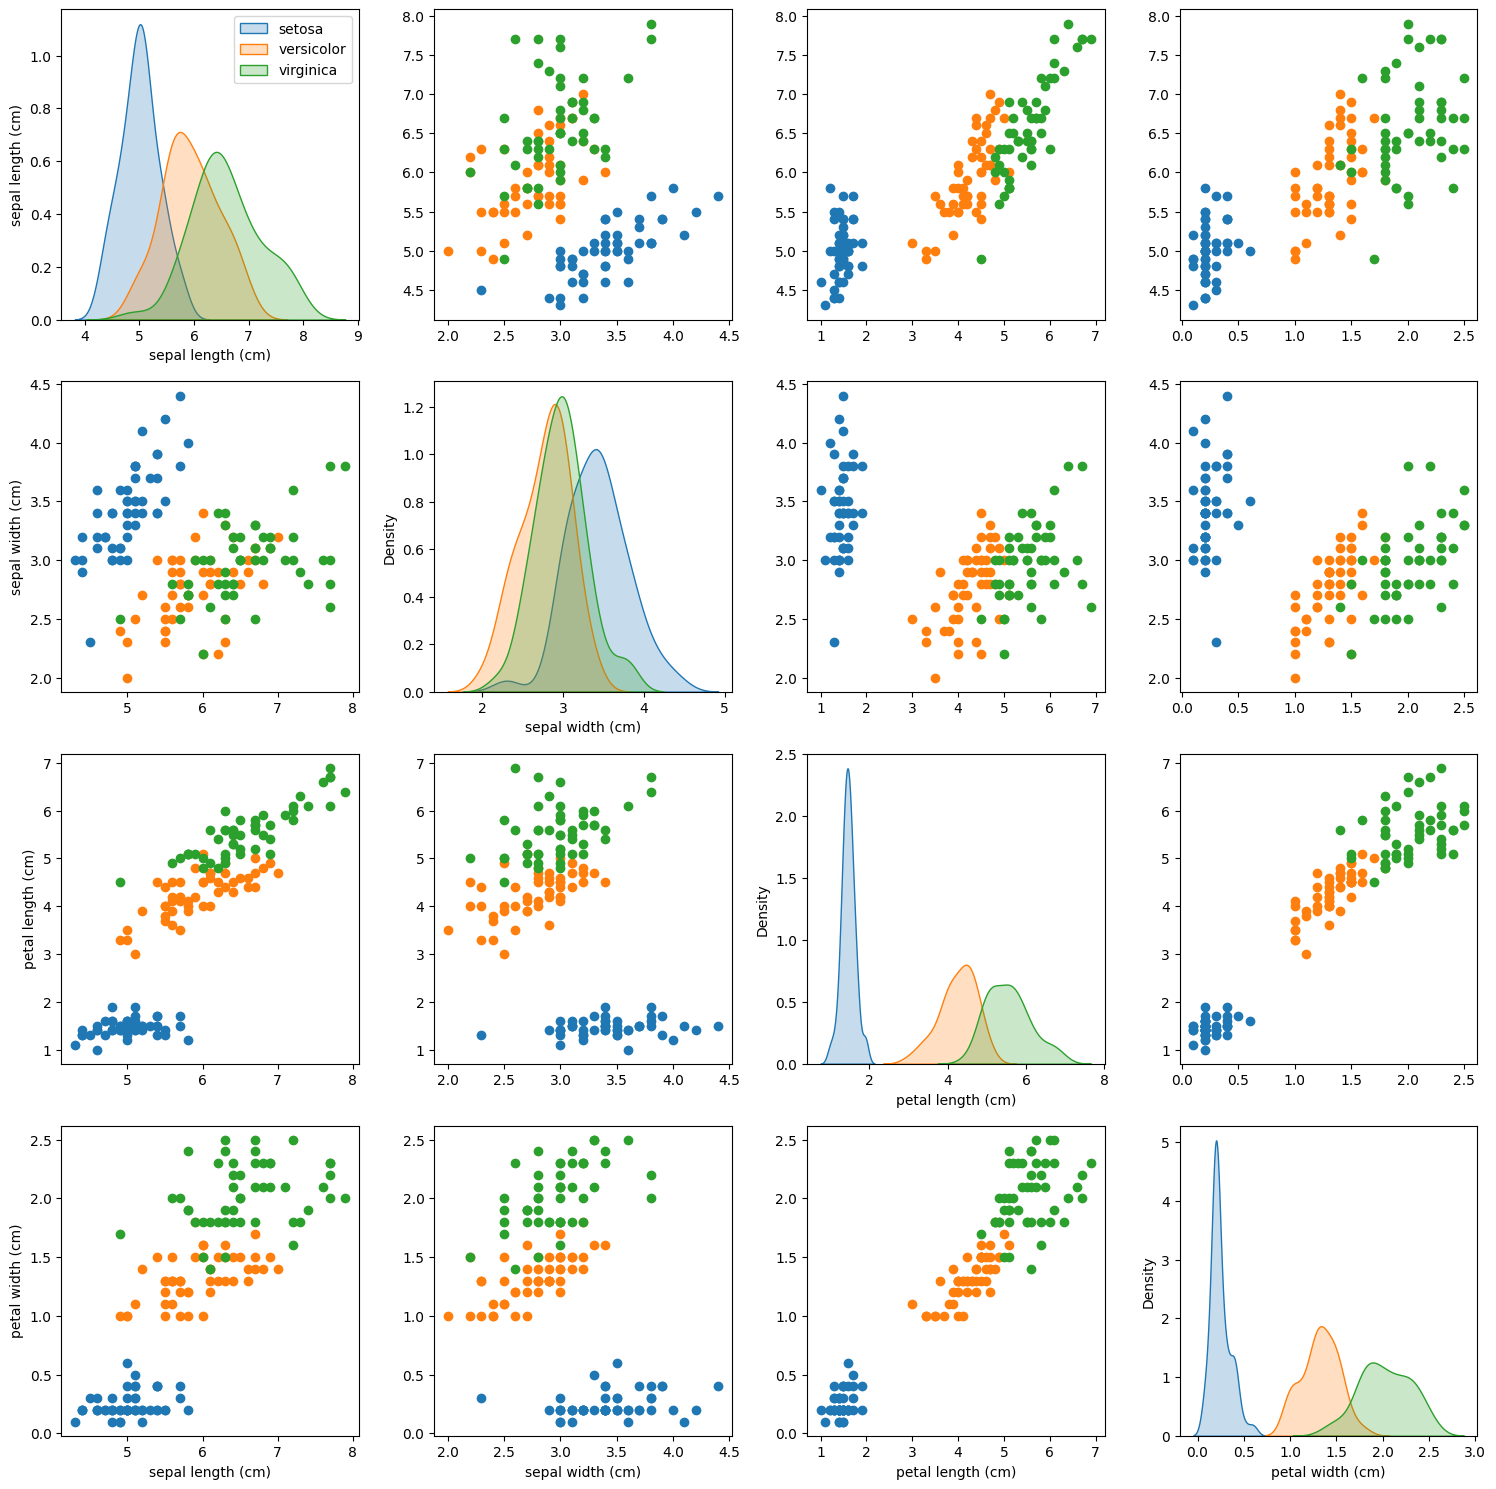

In [50]:
pair_plot_w_kde(kde_plot_seaborn=True)

### Pair plot (matplotlib) and kernel density (matplotlib)

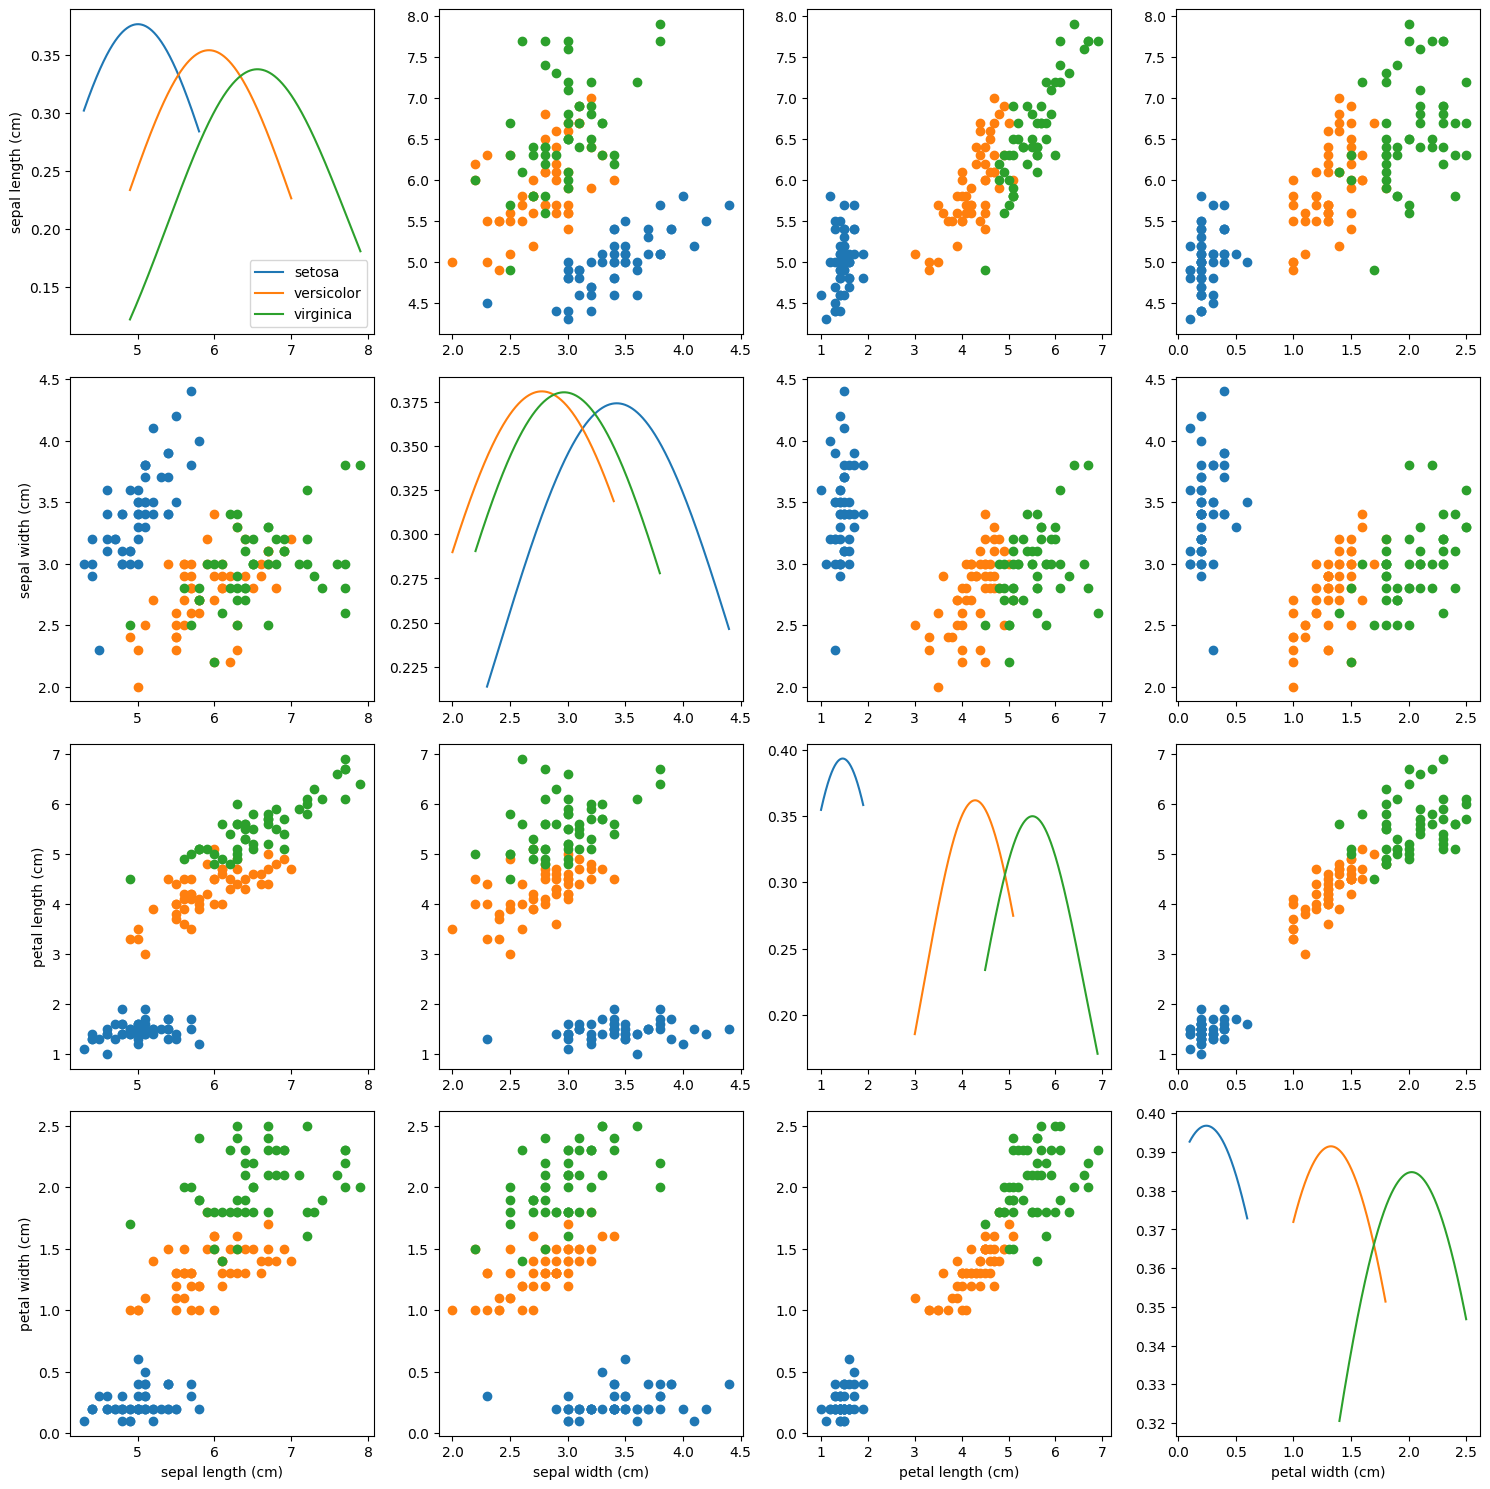

In [51]:
pair_plot_w_kde(kde_plot_seaborn=False)

In [52]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Common functions

In [53]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

def plot_clusters(ax, X, labels, title):
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=40)
    ax.set_title(title)
    ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")


def plot_kmeans_grid(X, n_clusters_values):
    _, axes = plt.subplots(1, len(n_clusters_values), figsize=(15, 5))
    
    for i, n_clusters in enumerate(n_clusters_values):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X)
        plot_clusters(axes[i], X, labels, f'K-Means - Clusters: {n_clusters}')

    plt.tight_layout()
    plt.show()


def plot_gaussian_grid(X, n_components_values, covariance_types):
    _, axes = plt.subplots(len(n_components_values), len(covariance_types), figsize=(15, 15))
    
    for i, n_components in enumerate(n_components_values):
        for j, covariance_type in enumerate(covariance_types):
            gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
            labels = gmm.fit_predict(X)
            plot_clusters(axes[i, j], X, labels, f'Gaussian Mixture - Components: {n_components}, Covariance: {covariance_type}')

    plt.tight_layout()
    plt.show()


def plot_dbscan_grid(X, eps_values, min_samples_values):
    _, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))
    
    for i, eps in enumerate(eps_values):
        for j, min_samples in enumerate(min_samples_values):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            plot_clusters(axes[i, j], X, labels, f'DBSCAN - Eps: {eps}, Min Samples: {min_samples}')

    plt.tight_layout()
    plt.show()

### K-means clustering

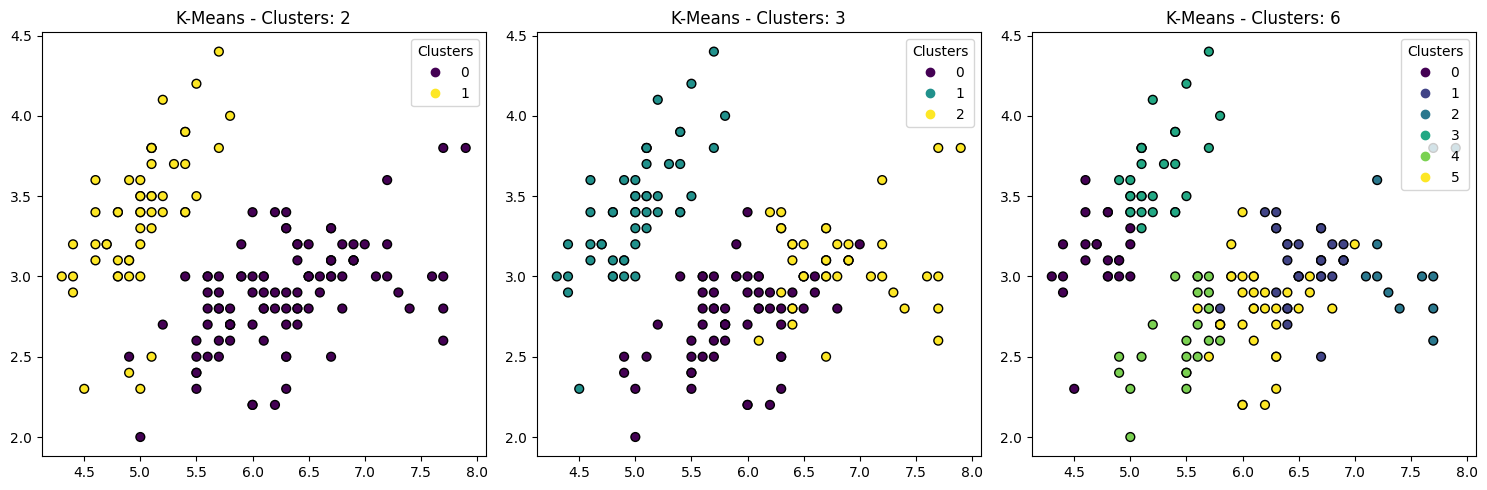

In [54]:
n_clusters_values = [2, 3, 6]
plot_kmeans_grid(iris_df.iloc[:, :-1].values, n_clusters_values)

### Gaussian mixture clustering

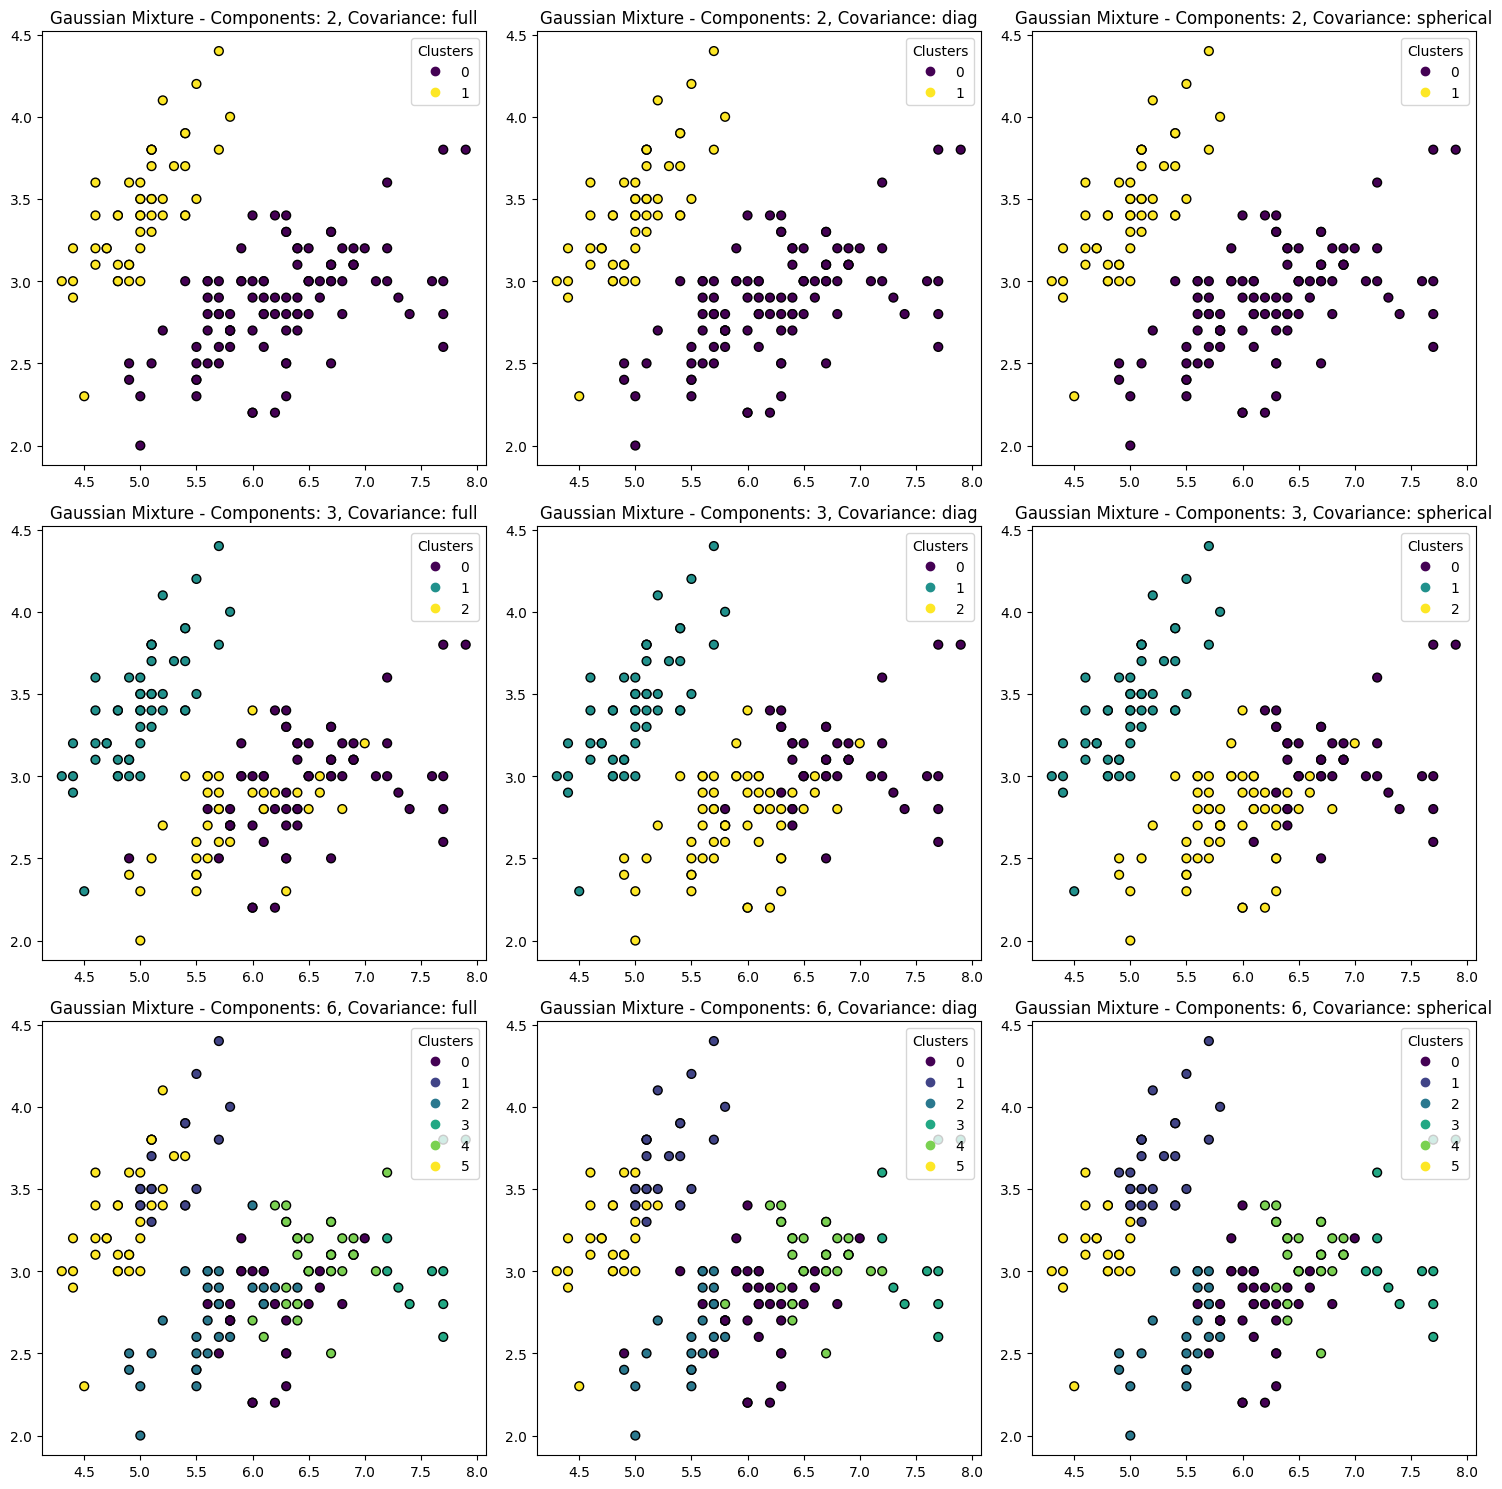

In [55]:
n_components_values = [2, 3, 6]
covariance_types = ['full', 'diag', 'spherical']
plot_gaussian_grid(iris_df.iloc[:, :-1].values, n_components_values, covariance_types)

### DBSCAN clustering

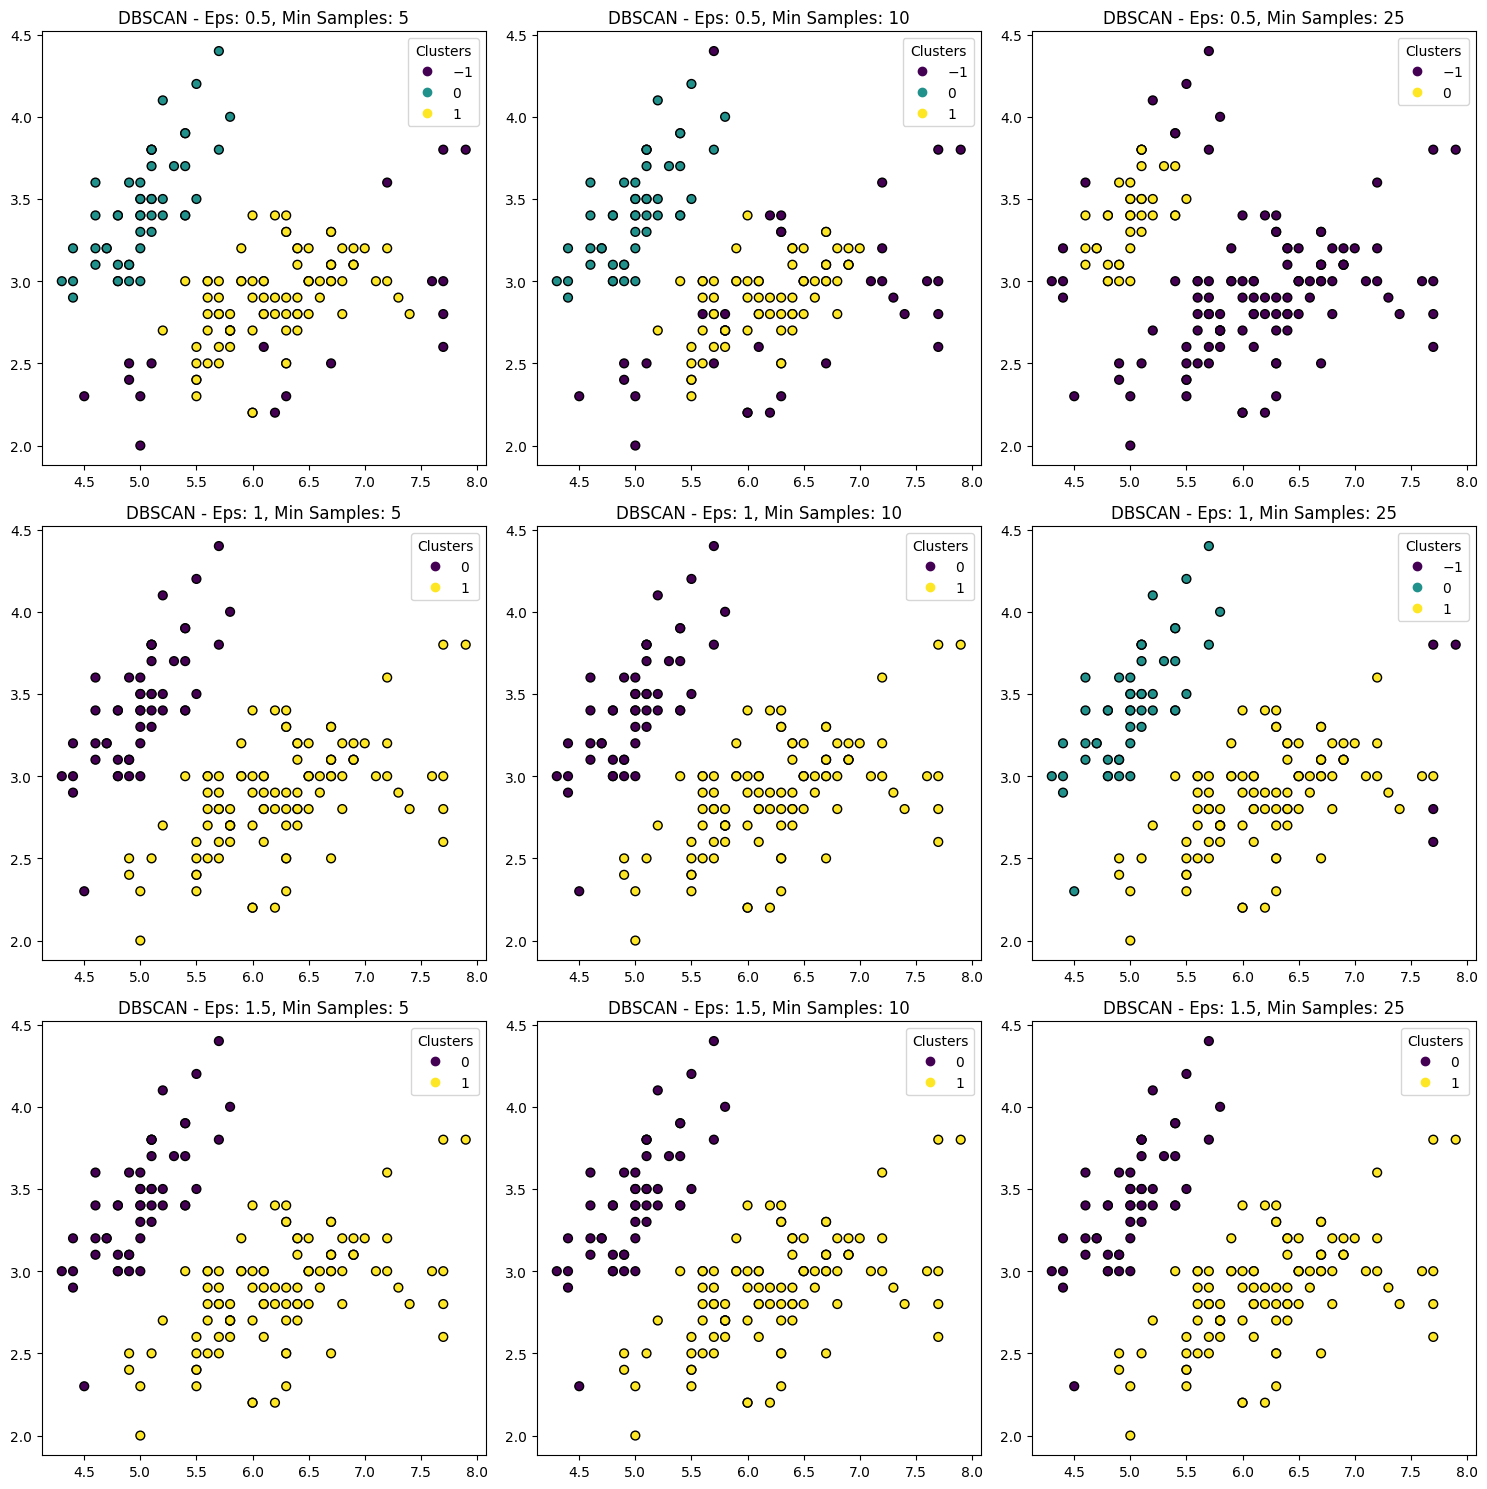

In [56]:
eps_values = [.5, 1, 1.5]
min_samples_values = [5, 10, 25]
plot_dbscan_grid(iris_df.iloc[:, :-1].values, eps_values, min_samples_values)

### Analysis of results

🇧🇷


#### K-Means

- O algoritmo K-Means é sensível à inicialização e pode produzir resultados diferentes em diferentes execuções.
- A variabilidade nos resultados pode ser observada, especialmente nos conjuntos de dados com sobreposição de classes.
- O número de clusters especificado influencia a divisão dos dados.

#### Gaussian Mixture:

- O algoritmo Gaussian Mixture é mais flexível em termos de covariância e pode se ajustar melhor a formas elípticas.
- A escolha do número de componentes e do tipo de covariância impacta significativamente os resultados.
- O modelo pode se adaptar a diferentes formas de agrupamento. Mas pode não representar precisamente cluster com uma estrutura circular ou de modo que os vizinhos verdadeiros não estejam necessáriamente próximos entre si.

#### DBSCAN:

- O DBSCAN é sensível aos hiperparâmetros eps e min_samples, e a escolha desses parâmetros afeta a identificação dos clusters.
- A capacidade do DBSCAN em identificar clusters de diferentes formas e tamanhos é uma vantagem.
- Pode ser desafiador para conjuntos de dados densamente agrupados. Ao passo que é útil para detectar outliers.

-----

🇺🇸

#### K-Means

- The K-Means algorithm is initialization sensitive and may produce different results on different runs.
- Variability in results can be observed, especially in data sets with overlapping classes.
- The specified number of clusters influences the division of the data.

#### Gaussian Mixture:

- The Gaussian Mixture algorithm is more flexible in terms of covariance and can better fit elliptical shapes.
- The choice of the number of components and the type of covariance significantly impacts the results.
- The model can adapt to different forms of grouping. But it may not accurately represent clusters with a circular structure or such that true neighbors are not necessarily close to each other.

#### DBSCAN:

- DBSCAN is sensitive to the eps and min_samples hyperparameters, and the choice of these parameters affects the identification of clusters.
- DBSCAN's ability to identify clusters of different shapes and sizes is an advantage.
- Can be challenging for densely clustered datasets. Whereas it is useful for detecting outliers